## TP2

 ## Exercice 1: Marche aléatoire 1D

In [197]:
import numpy as np
import matplotlib.pyplot as plt

Fonction : Génère une marche aléatoire 1D 

In [198]:
def marche_aleatoire(p, N):
    # Tirages aléatoires pour N pas
    tirages = np.random.rand(N)
    # +1 si tirage < p, sinon -1
    pas = np.where(tirages < p, 1, -1)
    #Le déplacement final après N pas est la somme des +1 et -1
    return pas.sum()

Monte Carlo : on répète M fois la marche

In [199]:
def monte_carlo(p, N, M):
    #un tableau vide de taille M pour stocker les déplacements finaux
    deplacements = np.zeros(M)
    # répète M fois l’expérience
    for i in range(M):
        #stocke le déplacement final
        deplacements[i] = marche_aleatoire(p, N)
    # La moyenne des déplacements
    moyenne = deplacements.mean()
    # L'écart-type 
    ecart_type = deplacements.std()
    # renvoie la moyenne, l'écart-type 
    return moyenne, ecart_type

Représentation d’une marche aléatoire 1D

In [200]:
p = 0.6   # probabilité pas +1
N = 200   # nombre de pas<

Génération d’une trajectoire

In [201]:
tirages = np.random.rand(N)
pas = np.where(tirages<p,1,-1)
X = np.cumsum(pas) 

Affichage de la trajectoire

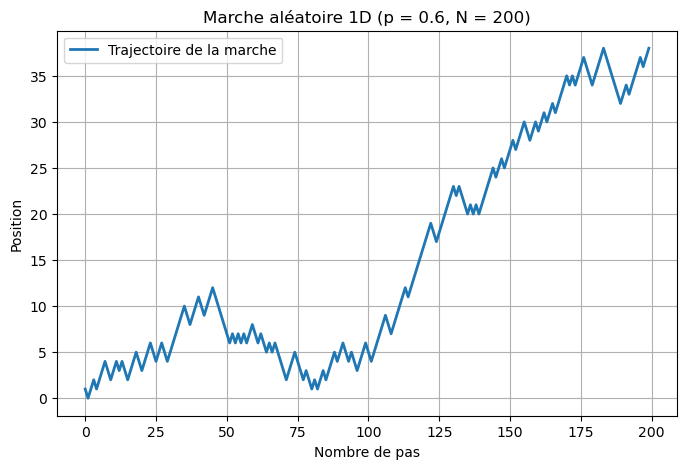

In [202]:
plt.figure(figsize=(8, 5))
plt.plot(X, label="Trajectoire de la marche", linewidth=2)
plt.title("Marche aléatoire 1D (p = 0.6, N = 200)")
plt.xlabel("Nombre de pas")
plt.ylabel("Position")
plt.grid(True)
plt.legend()
plt.show()

Étude moyennes et écarts-types

In [203]:
M_values = [10, 100, 1000, 10000]

In [204]:
moy_sim = []
ec_sim = []

In [205]:
for M in M_values:
    moy, ec = monte_carlo(p, N, M)
    moy_sim.append(moy)
    ec_sim.append(ec)

Valeurs théoriques 

In [206]:
mu_theo = N * (2*p - 1)
sigma_theo = np.sqrt(N * 4*p*(1-p))

Graphique des moyennes et écarts-types

In [207]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Graphique des moyennes 

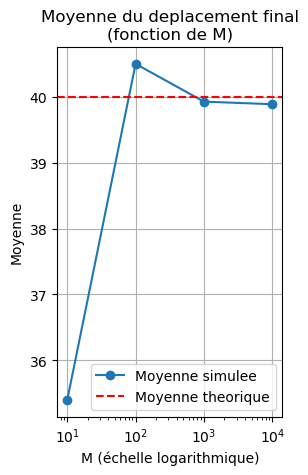

In [208]:
plt.subplot(1, 2, 1)
plt.plot(M_values, moy_sim, marker='o', label="Moyenne simulee")
plt.axhline(mu_theo, color='red', linestyle='--', label="Moyenne theorique")
plt.xscale("log")
plt.title("Moyenne du deplacement final\n(fonction de M)")
plt.xlabel("M (échelle logarithmique)")
plt.ylabel("Moyenne")
plt.grid(True)
plt.legend()

Graphique des écarts-types

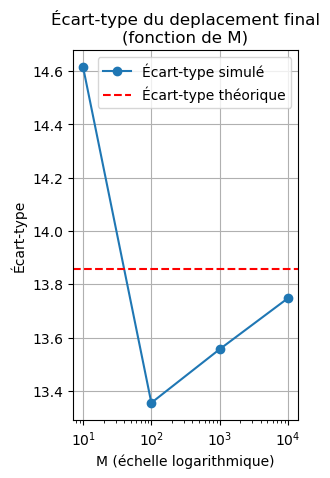

In [209]:
plt.subplot(1, 2, 2)
plt.plot(M_values, ec_sim, marker='o', label="Écart-type simulé")
plt.axhline(sigma_theo, color='red', linestyle='--', label="Écart-type théorique")
plt.xscale("log")
plt.title("Écart-type du deplacement final\n(fonction de M)")
plt.xlabel("M (échelle logarithmique)")
plt.ylabel("Écart-type")
plt.grid(True)
plt.legend()

In [210]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

## Exercice 2: Marche aléatoire 2D


In [211]:
import numpy as np
import matplotlib.pyplot as plt

Marche aléatoire 2D perpendiculaire aux axes

In [212]:
def marche_aleatoire_2D(N):
    # 4 directions possibles
    directions = np.array([
        [1, 0],   # +x
        [-1, 0],  # -x
        [0, 1],   # +y
        [0, -1]   # -y
    ])
    # Pour chaque pas choisir une direction aléatoire
    tirages = np.random.randint(0, 4, size=N)
    # Selection des vecteurs de deplacement
    pas = directions[tirages]
    # Trajectoire cumulée
    X = np.cumsum(pas[:, 0])
    Y = np.cumsum(pas[:, 1])
    return X, Y

AFFICHAGE DE LA MARCHE 2D

In [213]:
N = 500  # nombre de pas
# Génération de la marche
X, Y = marche_aleatoire_2D(N)

Affichage de la trajectoire

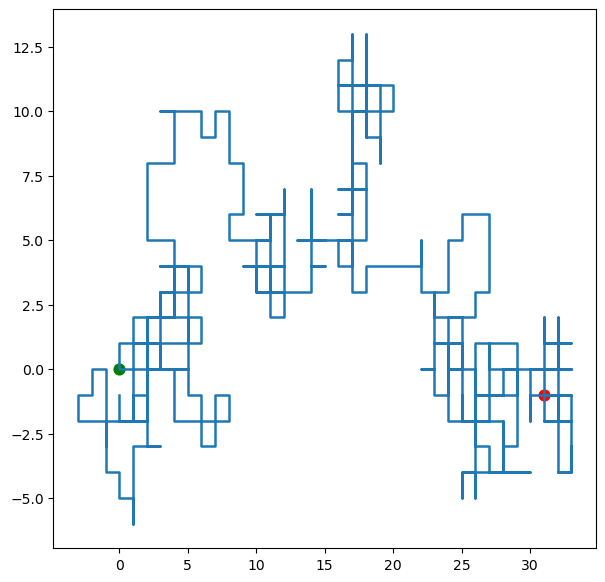

In [214]:
plt.figure(figsize=(7, 7))
plt.plot(X, Y, linewidth=1.8, label="Trajectoire 2D")
plt.scatter([0], [0], color='green', label="Départ", s=60)
plt.scatter([X[-1]], [Y[-1]], color='red', label="Arrivée", s=60)

## Exercice 3: Fourmi de Langton

In [215]:
import numpy as np
import matplotlib.pyplot as plt

In [216]:
import numpy as np 
def fourmi_langton(nb_steps, taille=101):
    taille=100
    grille = np.zeros((taille, taille), dtype=int)
    # position initiale au centre
    x = y = taille//2
    orientation = 0  # 0=haut,1=droite,2=bas,3=gauche
    pos_x = [x]
    pos_y = [y]
    for step in range(nb_steps):
        if grille[y, x] == 0:
            # case blanche -> tourne à gauche
            orientation = (orientation - 1) % 4
            grille[y, x] = 1
        else:
            # case noire -> tourne à droite
            orientation = (orientation + 1) % 4
            grille[y, x] = 0
        # avance d'une case selon orientation
        if orientation == 0:
            y -= 1
        elif orientation == 1:
            x += 1
        elif orientation == 2:
            y += 1
        elif orientation == 3:
            x -= 1
        # gestion des bords
        if not (0 <= x < taille and 0 <= y < taille):
            raise IndexError('La fourmi a quitté la grille')
        pos_x.append(x)
        pos_y.append(y)
    return np.array(pos_x), np.array(pos_y), grille

SIMULATION

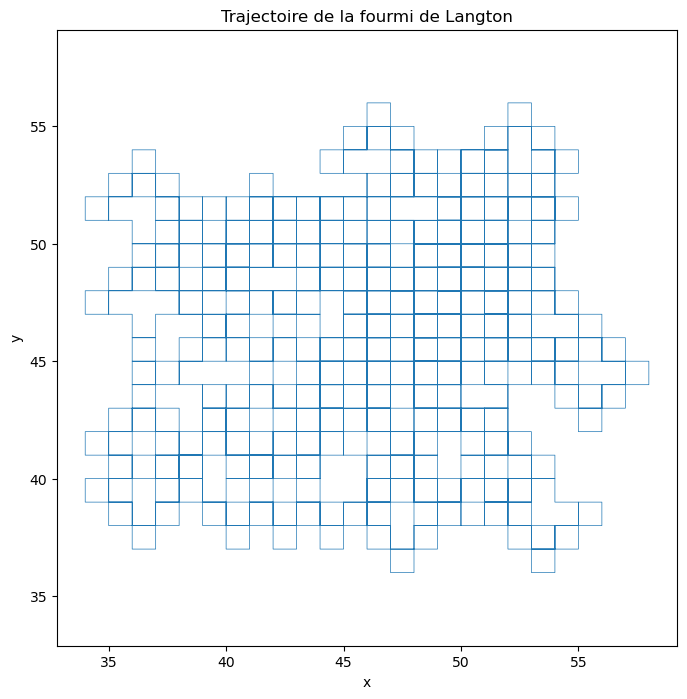

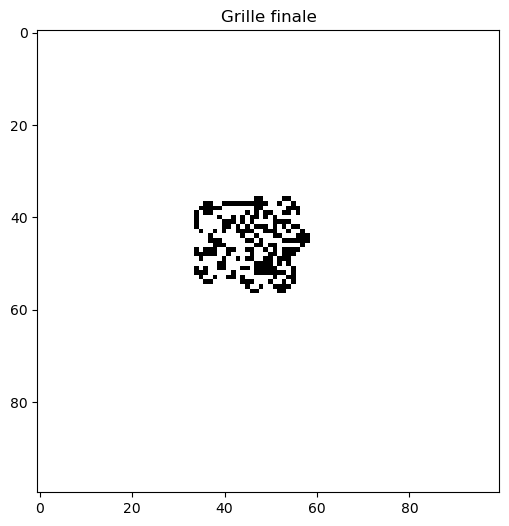

In [217]:
if __name__ == '__main__':
    nb_steps = 2000
    taille = 200  
    x_pos, y_pos, grille_finale = fourmi_langton(nb_steps, taille=taille)
    
    plt.figure(figsize=(8,8))
    plt.plot(x_pos, y_pos, linewidth=0.5)
    plt.title("Trajectoire de la fourmi de Langton")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('equal')
    plt.show()

    plt.figure(figsize=(6,6))
    plt.imshow(grille_finale, cmap='binary')
    plt.title('Grille finale')
    
    plt.show()
